In [ ]:
%matplotlib inline


Find the bounding box of an object
===================================

This example shows how to extract the bounding box of the largest object




[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.06757633e+02 1.84403070e+02 2.92799532e-02 7.73971386e+01
  3.75695080e+01 2.36386803e+01 4.76826141e+01 8.84635461e+01
  1.01572473e+02 1.37937084e+02 1.07313796e+02 1.75416192e+02
  5.23397759e+01 2.24798064e+02 7.01122386e+00 1.71639683e+02
  1.06830029e+02 1.43024596e+02 3.59390563e+01 5.07139812e+01
  2.04990610e+02 2.47874963e+02 8.02365896e+01 1.77234590e+02
  2.24355623e+02 2.29019306e+02 2.17713181e+01 9.99802451e+00
  4.34765874e+01 2.24804481e+02 2.51767895e+01 1.07803552e+02
  2.45219720e+02 1.36490313e+02 1.77120541e+02 8.07720015e+01
  1.75744237e+02 2.13664172e+02 4.68179900e+00 1.92036945e+02
  2.53148439e+02 1.91530408e+02 7.17936620e+01 2.02055508e+02
  2.64258577e+01 1.14660743e+02 2.32600449e+02 7.51652220e+01
  7.36704867e+01 3.32873145e+01 4.95794121e+00 1.73781896e+02
  5.41767977e+01 6.79799448e+01 1.2584

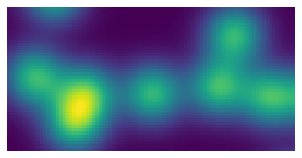

In [3]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
print(im)
points = l*np.random.random((2, n**2))
print(points)
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = im > im.mean()
print(type(mask))

label_im, nb_labels = ndimage.label(mask)

# Find the largest connected component
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mask_size = sizes < 1000
remove_pixel = mask_size[label_im]
label_im[remove_pixel] = 0
labels = np.unique(label_im)
label_im = np.searchsorted(labels, label_im)

# Now that we have only one connected component, extract it's bounding box
slice_x, slice_y = ndimage.find_objects(label_im==4)[0]
roi = im[slice_x, slice_y]

plt.figure(figsize=(4, 2))
plt.axes([0, 0, 1, 1])
plt.imshow(roi)
plt.axis('off')

plt.show()